In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
train = pd.read_csv('../input/titanicdata/titanic_train.csv')

In [3]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


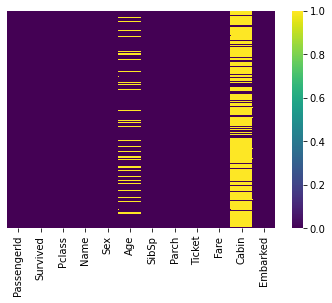

In [5]:
sns.heatmap(train.isnull(), yticklabels=False, cmap='viridis')

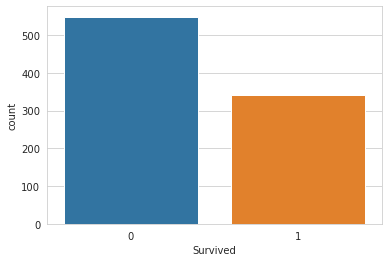

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train)

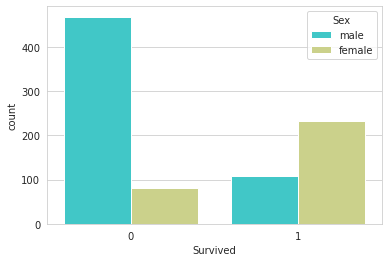

In [7]:
sns.countplot(x='Survived', data=train, hue='Sex', palette='rainbow')

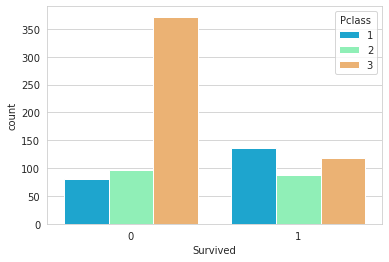

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train, hue='Pclass', palette='rainbow')

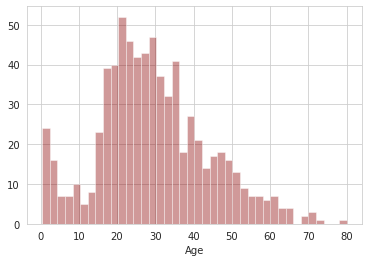

In [9]:
 sns.distplot(train['Age'].dropna(), color="darkred", kde=False, bins=40)

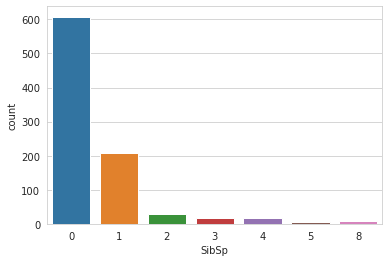

In [10]:
sns.countplot(x='SibSp', data=train)

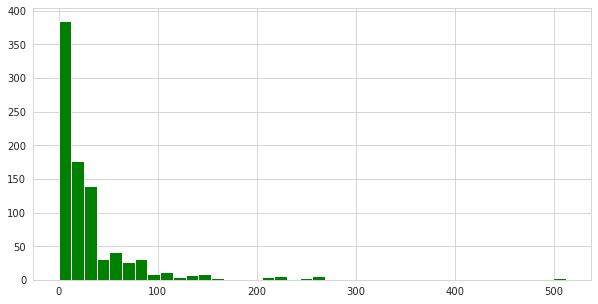

In [11]:
train['Fare'].hist(color='green', bins=40, figsize = (10,5))

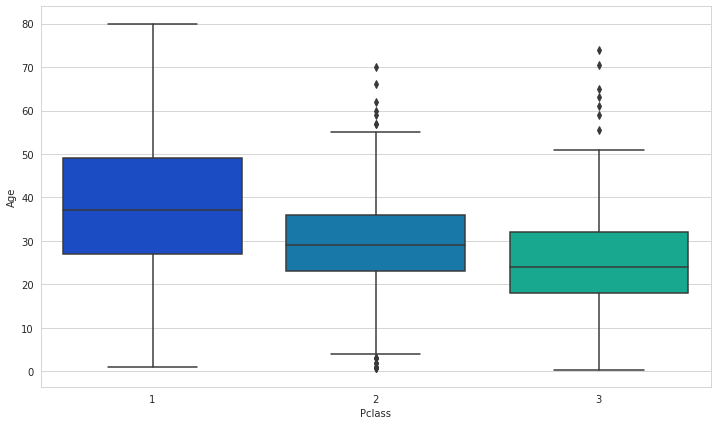

In [12]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age', data=train, palette='winter')

In [13]:
def impute_age(cols):
  Age = cols[0]
  Pclass = cols[1]
  if pd.isnull(Age):
    if Pclass == 1:
      return 37
    elif Pclass == 2:
      return 29
    else:
      return 24
  else:
    return Age

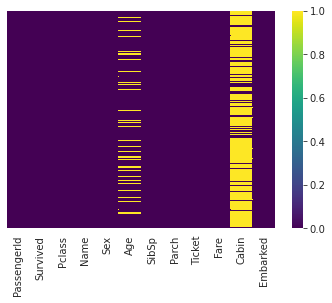

In [14]:
sns.heatmap(train.isnull(), cmap='viridis', yticklabels=False)

In [15]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
pd.get_dummies(train['Embarked'], drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [17]:
pd.get_dummies(train['Sex'],drop_first= True).head()


,male
0,1
1,0
2,0
3,0
4,1


In [18]:
sex = pd.get_dummies(train['Sex'], drop_first = True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [19]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace = True)

In [20]:
train.head()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin
0,1,0,3,22.0,1,0,7.2500,NaN
1,2,1,1,38.0,1,0,71.2833,C85
2,3,1,3,26.0,0,0,7.9250,NaN
3,4,1,1,35.0,1,0,53.1000,C123
4,5,0,3,35.0,0,0,8.0500,NaN


In [21]:
train = pd.concat([train, sex, embark], axis=1)

In [22]:
train.head()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
0,1,0,3,22.0,1,0,7.2500,NaN,1,0,1
1,2,1,1,38.0,1,0,71.2833,C85,0,0,0
2,3,1,3,26.0,0,0,7.9250,NaN,0,0,1
3,4,1,1,35.0,1,0,53.1000,C123,0,0,1
4,5,0,3,35.0,0,0,8.0500,NaN,1,0,1
